# Data Load and Wrangle

## The goal of the exercise is to load a dataset, clean and transform and compute descriptive statistics

In [1]:
# This piece of code enables to display multiple output within a cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

<div class="alert alert-block alert-warning">
    
## Task Instructions 
### Load one of the built in dataset
### Transform the data as required 
### From a perspective of a journalist interested in writing a story about the data, **_ask and answer_** **3** questions that summarize the sample. 
    
#### Please *_only use summary statistics_* (mean, median, mode, standard deviation, variance, range,..). The statistics can be computed by groups.

#### Reference :https://kolesnikov.ga/Datasets_in_Python/

</div>

In [46]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

In [4]:
co2 = sm.datasets.co2
print(co2.DESCRLONG)


Atmospheric CO2 from Continuous Air Samples at Mauna Loa Observatory, Hawaii, U.S.A.

Period of Record: March 1958 - December 2001

Methods: An Applied Physics Corporation (APC) nondispersive infrared gas analyzer was used to obtain atmospheric CO2 concentrations, based on continuous data (four measurements per hour) from atop intake lines on several towers. Steady data periods of not less than six hours per day are required; if no such six-hour periods are available on any given day, then no data are used that day. Weekly averages were calculated for most weeks throughout the approximately 44 years of record. The continuous data for year 2000 is compared with flask data from the same site in the graphics section.


In [5]:
print(co2.NOTE)

::

    Number of observations: 2225
    Number of variables: 2
    Variable name definitions:

        date - sample date in YYMMDD format
        co2 - CO2 Concentration ppmv

    The data returned by load_pandas contains the dates as the index.



In [6]:
dataset_co2 = co2.load_pandas()

In [7]:
## Data 
df_co2 = dataset_co2.data
df_co2.head()

,co2
1958-03-29,316.1
1958-04-05,317.3
1958-04-12,317.6
1958-04-19,317.5
1958-04-26,316.4


In [8]:
#Data
sm.datasets.co2.load_pandas().data

,co2
1958-03-29,316.1
1958-04-05,317.3
1958-04-12,317.6
1958-04-19,317.5
1958-04-26,316.4
...,...
2001-12-01,370.3
2001-12-08,370.8
2001-12-15,371.2
2001-12-22,371.3


In [9]:
mydataframe = sm.datasets.co2.load_pandas().data


In [10]:
df_co2.tail()

,co2
2001-12-01,370.3
2001-12-08,370.8
2001-12-15,371.2
2001-12-22,371.3
2001-12-29,371.5


In [11]:
df_co2['recordeddate'] = df_co2.index

In [12]:
df_co2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2284 entries, 1958-03-29 to 2001-12-29
Freq: W-SAT
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   co2           2225 non-null   float64       
 1   recordeddate  2284 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1)
memory usage: 53.5 KB


In [13]:
df_co2.shape

(2284, 2)

In [14]:
df_co2.describe()

,co2
count,2225.000000
mean,340.142247
std,17.003885
min,313.000000
25%,324.800000
50%,338.300000
75%,354.800000
max,373.900000


In [15]:
#C02_decade = df_co2.groupby(df_co2.index.year // 10 * 10 ).mean()
#C02_decade

In [16]:
#df_recordeddate.mean()
df_co2.index.mean()

Timestamp('1980-02-12 11:59:59.999998016', freq='W-SAT')

Question 1. Has the CO2 concentration in Hawaii increased over time?
- Yes the concentration has increased from 370.3-371.5 in the month of December, 2001. 

Question 2. What is the average CO2 concentration in Hawaii in 1980?
- The average CO2 concentration in 1980 is 345.279304. The average CO2 concentration has gone up from 315.739726 in 1950 to 370.102857 in 2000.  

Question 3. How many observations were recorded and what was the highest concentration recorded?
- There were 2225 observations recorded and the highest concentration recorded was 373.900


In [17]:
df_co2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2284 entries, 1958-03-29 to 2001-12-29
Freq: W-SAT
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   co2           2225 non-null   float64       
 1   recordeddate  2284 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1)
memory usage: 53.5 KB


In [18]:
import matplotlib.pyplot as plt
from scipy import stats 

(array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]),
 array([-0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5]),
 <BarContainer object of 10 artists>)

(array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]),
 array([0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3, 1.4, 1.5]),
 <BarContainer object of 10 artists>)

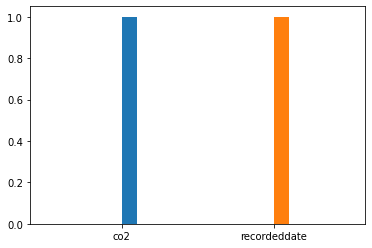

In [19]:
#Plot Histogram of CO2 and Recordeddate. I was having issues with plotting a Histogram as I intended. 
plt.hist(['co2'], bins=10, alpha=1)
plt.hist(['recordeddate'], bins=10, alpha=1, orientation='vertical')
plt.show()


In [20]:
df_co2.columns

Index(['co2', 'recordeddate'], dtype='object')

<AxesSubplot:>

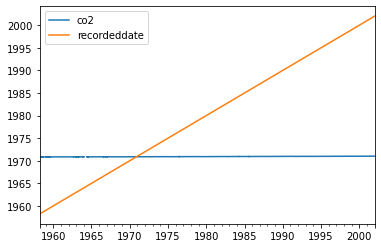

In [21]:
df_co2[['co2','recordeddate']].plot()
#Number of CO2 Concentration versus the years (decades) 

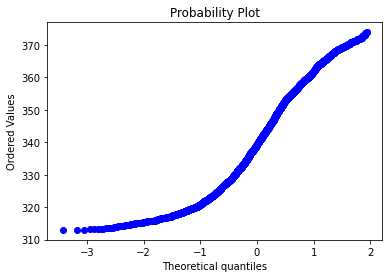

In [22]:
fig = plt.figure()
res = stats.probplot(df_co2['co2'], plot = plt)

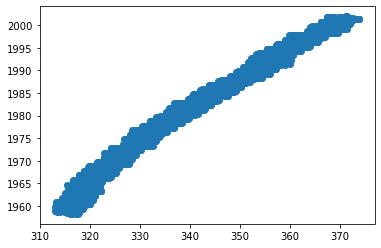

In [23]:
plt.scatter(df_co2['co2'],df_co2['recordeddate'])

#Hypothesis 1: The concentration of CO2 increases as the years go by. 
#Hypothesis 2: The CO2 concentration has increased linearly. 

In [25]:
df_co2.head(4)

,co2,recordeddate
1958-03-29,316.1,1958-03-29
1958-04-05,317.3,1958-04-05
1958-04-12,317.6,1958-04-12
1958-04-19,317.5,1958-04-19


In [29]:
#co2.columns = df_co2.columns.str.replace(' ', '')
#co2.columns = [col.lower() for col in co2]
#co2.columns

TypeError: 'module' object is not iterable

In [35]:
# Marking the features or columns as numeric or categorical for easy referencce later in the code
numericfeatures = [f for f in df_co2.columns if df_co2.dtypes[f] != 'object']
print("Number of Numerical features: ", len(numericfeatures))

categoricalfeatures = [f for f in df_co2.columns if df_co2.dtypes[f] == 'object']
print("Number of Categorical features: ", len(categoricalfeatures))

Number of Numerical features:  2
Number of Categorical features:  0


In [36]:
print("numeric features: " + str(numericfeatures))
print("categorical features: " + str(categoricalfeatures))

numeric features: ['co2', 'recordeddate']
categorical features: []


array([[<AxesSubplot:title={'center':'co2'}>]], dtype=object)

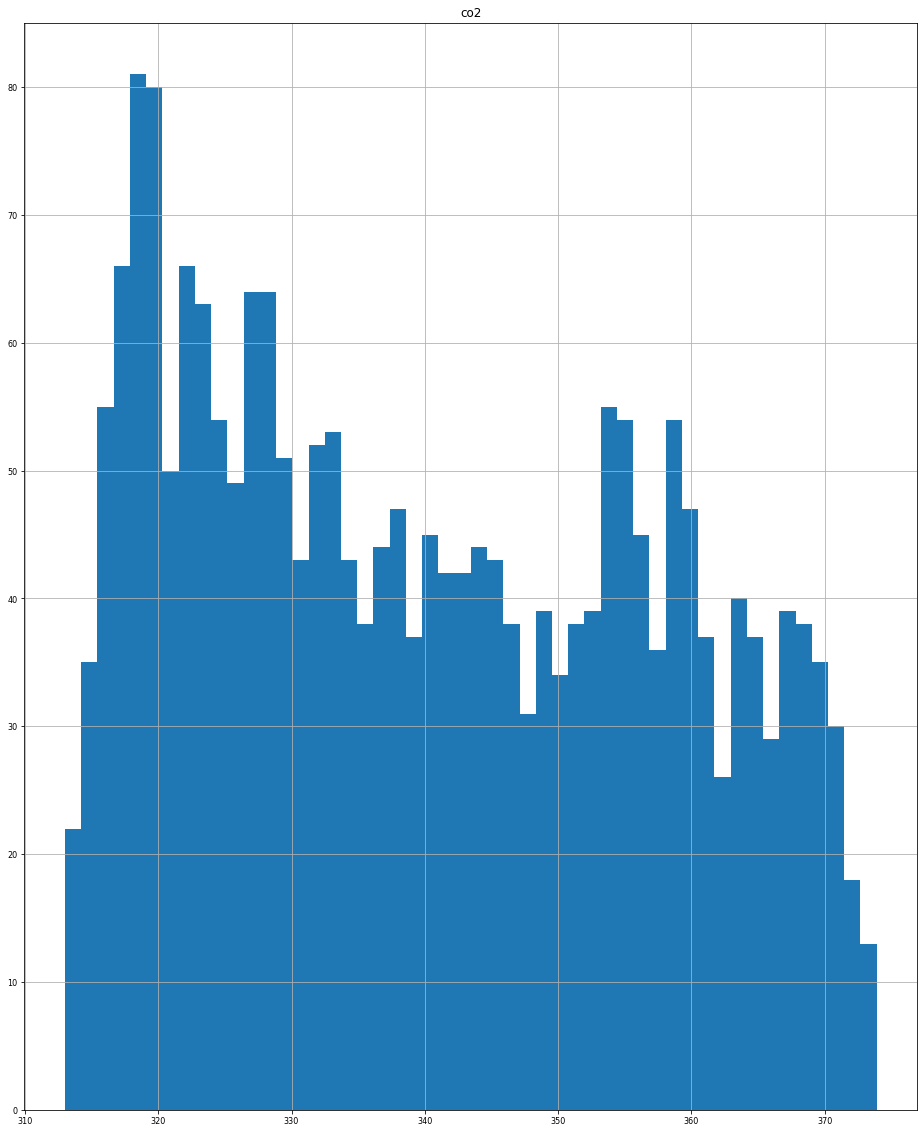

In [37]:
#EDA
#Univariate
# plot histogram chart
df_co2[numericfeatures].hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)
    

#

In [39]:
for col in list(categoricalfeatures) :
    print(df_co2[col].value_counts())
    print('#'*50)

# Hypothesis Testing

In [40]:
subsetd = df_co2[['recordeddate']]

In [32]:
from scipy.stats import shapiro
series_2test = df_co2[['recordeddate']]
stat, p = shapiro(series_2test)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably Gaussian')
else:
    print('Probably not Gaussian')

stat=0.955, p=0.000
Probably not Gaussian


In [43]:
df_co2['df_co2'] = np.log(df_co2['co2'])

<AxesSubplot:>

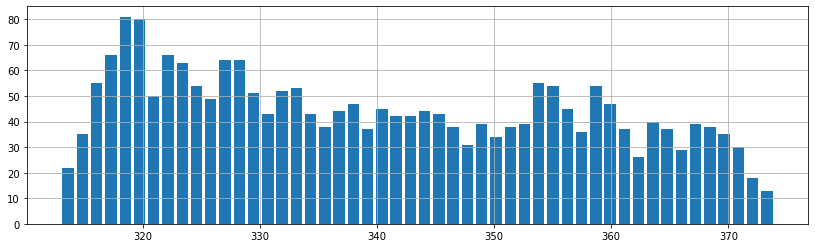

count    2225.000000
mean      340.142247
std        17.003885
min       313.000000
25%       324.800000
50%       338.300000
75%       354.800000
max       373.900000
Name: co2, dtype: float64

((array([-3.42852667, -3.17993969, -3.04219795, ...,  3.04219795,
          3.17993969,  3.42852667]),
  array([313. , 313. , 313.1, ...,   nan,   nan,   nan])),
 (nan, nan, nan))

Text(0, 0.5, 'co2')

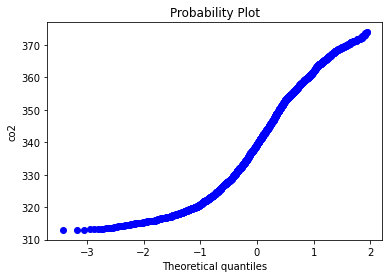

((array([-3.42852667, -3.17993969, -3.04219795, ...,  3.04219795,
          3.17993969,  3.42852667]),
  array([5.74620319, 5.74620319, 5.74652263, ...,        nan,        nan,
                nan])),
 (nan, nan, nan))

Text(0, 0.5, 'CO2')

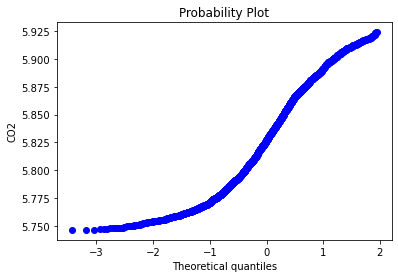

In [44]:
df_co2['co2'].hist(bins=50, rwidth=.8, figsize=(14,4))
plt.show()
df_co2['co2'].describe()

stats.probplot(df_co2['co2'], plot=plt)
plt.ylabel('co2')
plt.show()
stats.probplot(np.log(df_co2['co2']), plot=plt)
plt.ylabel('CO2')
plt.show()

In [53]:
from datetime import date
date_sold = pd.DataFrame({'year': df_co2['recordeddate'], 'month' : df_co2['recordeddate']})

DATE = []
for yr, mo in zip(date_sold.year, date_sold.month):
    DATE.append(date(yr, mo, 10))

df_co2 ['yrmosold'] = DATE
df_co2.head()

TypeError: an integer is required (got type Timestamp)

<BarContainer object of 2284 artists>

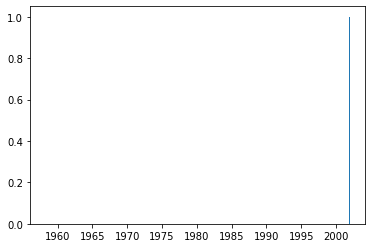

In [48]:
# Date range in the data
yax = df_co2.groupby(['recordeddate'])['recordeddate'].count()
plt.bar(yax.index, yax)

# Time Series

In [57]:
df_co2_ts = df_co2
df_co2_ts.info()
df_co2_ts.head()
df_co2_ts.tail()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2284 entries, 1958-03-29 to 2001-12-29
Freq: W-SAT
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   co2           2225 non-null   float64       
 1   recordeddate  2284 non-null   datetime64[ns]
 2   df_co2        2225 non-null   float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 151.4 KB


,co2,recordeddate,df_co2
1958-03-29,316.1,1958-03-29,5.756059
1958-04-05,317.3,1958-04-05,5.759848
1958-04-12,317.6,1958-04-12,5.760793
1958-04-19,317.5,1958-04-19,5.760478
1958-04-26,316.4,1958-04-26,5.757007


,co2,recordeddate,df_co2
2001-12-01,370.3,2001-12-01,5.914313
2001-12-08,370.8,2001-12-08,5.915663
2001-12-15,371.2,2001-12-15,5.916741
2001-12-22,371.3,2001-12-22,5.917010
2001-12-29,371.5,2001-12-29,5.917549


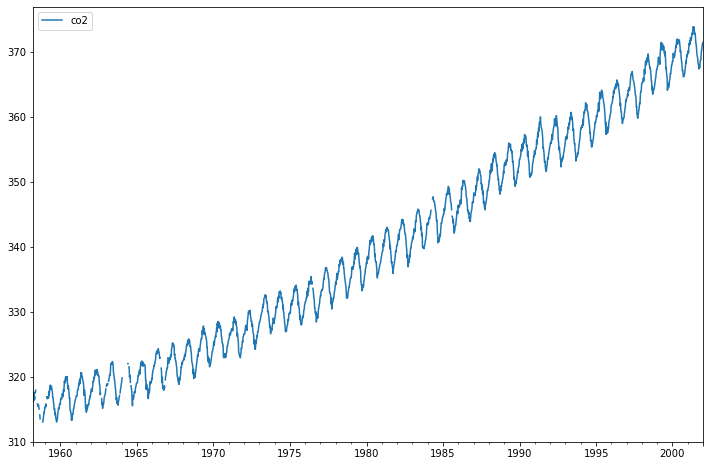

In [58]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
df_co2_ts.co2.plot(ax=ax);
legend = ax.legend(loc = 'upper left');
legend.prop.set_size(20);

# Decomposition of Time series into seasonal and trend

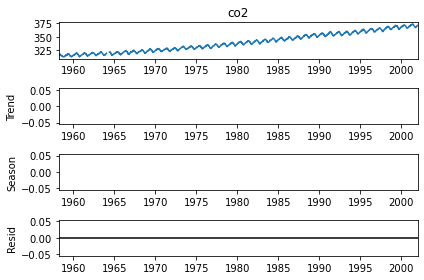

In [64]:
from statsmodels.tsa.seasonal import STL
stl = STL(pd.Series(df_co2_ts.co2),period =52)
res = stl.fit()
fig = res.plot()

# Predictive Modeling

In [54]:
from statsmodels.formula.api import ols
from sklearn.model_selection import train_test_split

target= subsetd['recordeddate']
df_train = subsetd.drop(['recordeddate'],axis=1)
x_train,x_test,y_train,y_test = train_test_split(df_train,target,test_size=0.33,random_state=0)
# Split data into train and test
df_co2_train = pd.concat([x_train, y_train], axis=1)
#ames_train.head()
df_co2_test = pd.concat([x_test, y_test], axis=1)

In [55]:
df_co2_train.shape
df_co2_test.shape

(1530, 1)

(754, 1)

In [56]:
formula = 'log_saleprice ~ totalsqft + totalbath + overallqual \
            + C(neighborbuckets) + age'
ames_model = ols(formula, data=df_co2_train).fit()
print(df_co2_model.summary())

PatsyError: Error evaluating factor: NameError: name 'totalsqft' is not defined
    log_saleprice ~ totalsqft + totalbath + overallqual             + C(neighborbuckets) + age
                    ^^^^^^^^^